In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img_array = cv2.imread("train/0/Training_3908.jpg")

In [4]:
img_array.shape

(48, 48, 3)

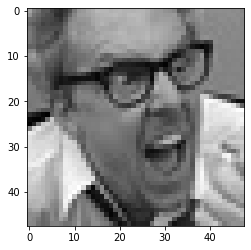

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "train/"

In [7]:
Classes = ["0","1","2","3","4","5","6"]

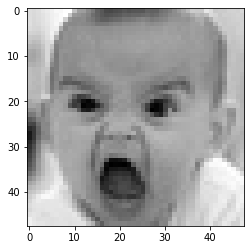

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    

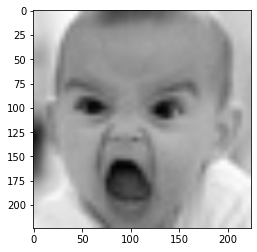

In [9]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        print(class_num)
        c=0
        for img in os.listdir(path):
            c+=1
            try:                
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        print(c)
    

In [12]:
create_training_Data()

0
377
1
256
2
340
3
349
4
369
5
360
6
368


In [13]:
print(len(training_Data))

2419


In [14]:
import random
random.shuffle(training_Data)

In [15]:
X = []
Y = []

for features, label in training_Data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [16]:
X.shape

(2419, 224, 224, 3)

In [17]:
X = X/255.0

In [18]:
Y[10]

3

In [19]:
# deep learning model for training - transfer learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.MobileNetV2()

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-2].output

In [24]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [25]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)


In [26]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [27]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [29]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
Y[700]

2

In [31]:
Y = np.array(Y)

In [32]:
new_model.fit(X,Y,epochs=25)

Epoch 1/25
76/76 [==============================] - 755s 10s/step - loss: 1.8015 - accuracy: 0.2925
Epoch 2/25
76/76 [==============================] - 506s 7s/step - loss: 1.2723 - accuracy: 0.5245
Epoch 3/25
76/76 [==============================] - 477s 6s/step - loss: 1.1780 - accuracy: 0.5606
Epoch 4/25
76/76 [==============================] - 522s 7s/step - loss: 0.9460 - accuracy: 0.6622
Epoch 5/25
76/76 [==============================] - 512s 7s/step - loss: 0.8595 - accuracy: 0.7011
Epoch 6/25
76/76 [==============================] - 501s 7s/step - loss: 0.6765 - accuracy: 0.7592
Epoch 7/25
76/76 [==============================] - 500s 7s/step - loss: 0.6266 - accuracy: 0.7700
Epoch 8/25
76/76 [==============================] - 527s 7s/step - loss: 0.4879 - accuracy: 0.8360
Epoch 9/25
76/76 [==============================] - 535s 7s/step - loss: 0.4244 - accuracy: 0.8564
Epoch 10/25
76/76 [==============================] - 529s 7s/step - loss: 0.4242 - accuracy: 0.8546
Epoch 11

In [33]:
new_model.save('my_model_64p35.h5')

In [34]:
new_model = tf.keras.models.load_model('my_model_64p35.h5')

In [35]:
frame = cv2.imread("sad.jfif")

In [36]:
frame.shape

(168, 299, 3)

In [37]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [38]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [39]:
gray.shape

(168, 299)

In [40]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
print(faces)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    print(facess)
    if len(facess) == 0:
        print("FACE NOT DETECTED")
    else:
        for (ex, ey, ew, eh) in facess:
            print("hi")
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

[[130  12 138 138]]
[[  7   9 119 119]]
hi


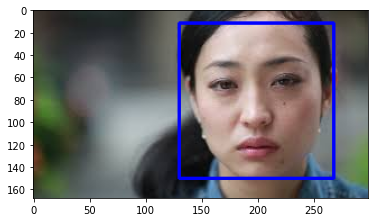

In [41]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

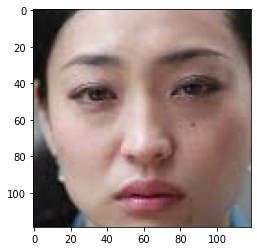

In [42]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [43]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [44]:
Predictions = new_model.predict(final_image)

In [45]:
Predictions[0]

array([1.9050644e-01, 1.3636613e-07, 5.2803057e-06, 1.0252730e-02,
       1.8369583e-04, 7.9843968e-01, 6.1204570e-04], dtype=float32)

In [46]:
np.argmax(Predictions)

5

In [47]:
for i in Predictions:
    for j in i:
        print(j)

0.19050644
1.3636613e-07
5.2803057e-06
0.01025273
0.00018369583
0.7984397
0.0006120457


In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "some text"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y),(text_offset_x+text_width +2, text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x, text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap = cv2.VideoCapture(0)
    
while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("FACE NOT DETECTED")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]


    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions= new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
        
    maxVal = np.argmax(Predictions)
    status = "dont know"
    if(maxVal==0):
        status = "Angry"
    elif(maxVal==1):
        status = "Disgust"
    elif(maxVal==2):
        status = "Fear"
    elif(maxVal==3):
        status = "Happy"
    elif(maxVal==4):
        status = "Neutral"
    elif(maxVal==5):
        status ="Sad"
    else:
        status = "Suprise"
    
    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
    cv2.putText(frame, status, (x1 + int(w1/10),y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
    cv2.putText(frame, status, (100,150),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
    
    
    cv2.imshow('face emotioon recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
FACE NOT DETECTED
